In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
import scipy.stats as stats
from sklearn.feature_selection import f_classif

import io

In [ ]:
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='ISO-8859-1')

Saving Liver Patient Dataset (LPD)_train.csv to Liver Patient Dataset (LPD)_train.csv


In [ ]:
data.drop(columns='Gender of the patient', inplace=True)

In [ ]:
print(len(data))

30691


In [ ]:
data.mean()

Age of the patient                       44.107205
Total Bilirubin                           3.370319
Direct Bilirubin                          1.528042
Alkphos Alkaline Phosphotase            289.075364
Sgpt Alamine Aminotransferase            81.488641
Sgot Aspartate Aminotransferase         111.469979
Total Protiens                            6.480237
ALB Albumin                               3.130142
A/G Ratio Albumin and Globulin Ratio      0.943467
Result                                    1.285882
dtype: float64

In [ ]:
data.median()

Age of the patient                       45.0
Total Bilirubin                           1.0
Direct Bilirubin                          0.3
Alkphos Alkaline Phosphotase            209.0
Sgpt Alamine Aminotransferase            35.0
Sgot Aspartate Aminotransferase          42.0
Total Protiens                            6.6
ALB Albumin                               3.1
A/G Ratio Albumin and Globulin Ratio      0.9
Result                                    1.0
dtype: float64

In [ ]:
data.std()

Age of the patient                       15.981043
Total Bilirubin                           6.255522
Direct Bilirubin                          2.869592
Alkphos Alkaline Phosphotase            238.537589
Sgpt Alamine Aminotransferase           182.158850
Sgot Aspartate Aminotransferase         280.851078
Total Protiens                            1.081980
ALB Albumin                               0.792281
A/G Ratio Albumin and Globulin Ratio      0.323164
Result                                    0.451841
dtype: float64

In [ ]:
print("Count of missing values:{}".format(data.isna().sum().sum()))

Count of missing values:4523


In [ ]:
parameters = []
print(data.columns)
for column in data.columns:
    parameters.append(column)

# Remove outliers
def remove_outliers(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col][~((data[col] < lower_bound) | (data[col] > upper_bound))] # ~ is used to invert the boolean values
        print(f"Median of {col} is {data[col].median()}")
        # print(data[col].isnull().sum(),data[col])
        if data[col].isnull().sum() > 0: # check if there are still missing values in the column by command data[col].isnull().sum()
            data[col].fillna(data[col].median(), inplace=True)
    return data

data_cleaned = remove_outliers(data)

print(data_cleaned)
seprator = "--------------------------------------------------------------\n--------------------------------------------------------------"
print(seprator)

# Normalize the data using Min-Max scaling
normalizer = MinMaxScaler()
data_cleaned_normalized = data_cleaned.copy()
data_cleaned_normalized.iloc[:, :-1] = normalizer.fit_transform(data_cleaned.iloc[:, :-1]) # fit_transform() returns a numpy array, so we need to convert it back to a dataframe
data_cleaned_normalized['Result'] = data_cleaned_normalized['Result'].astype('category')
# print(data_cleaned_normalized.head())
print(data_cleaned_normalized.info())
print(seprator)
print(round(data_cleaned_normalized.describe(), 3))

Index(['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')
Median of Age of the patient is 45.0
Median of Total Bilirubin is 0.9
Median of Direct Bilirubin is 0.2
Median of Alkphos Alkaline Phosphotase is 199.0
Median of Sgpt Alamine Aminotransferase is 31.0
Median of Sgot Aspartate Aminotransferase is 38.0
Median of Total Protiens is 6.6
Median of ALB Albumin is 3.1
Median of A/G Ratio Albumin and Globulin Ratio is 0.9
Median of Result is 1.0
       Age of the patient  Total Bilirubin  Direct Bilirubin  \
0                    65.0              0.7               0.1   
1                    62.0              0.9               0.2   
2                    62.0              0.9               0.2   
3                    58.0              1.0               0.4

<Axes: >

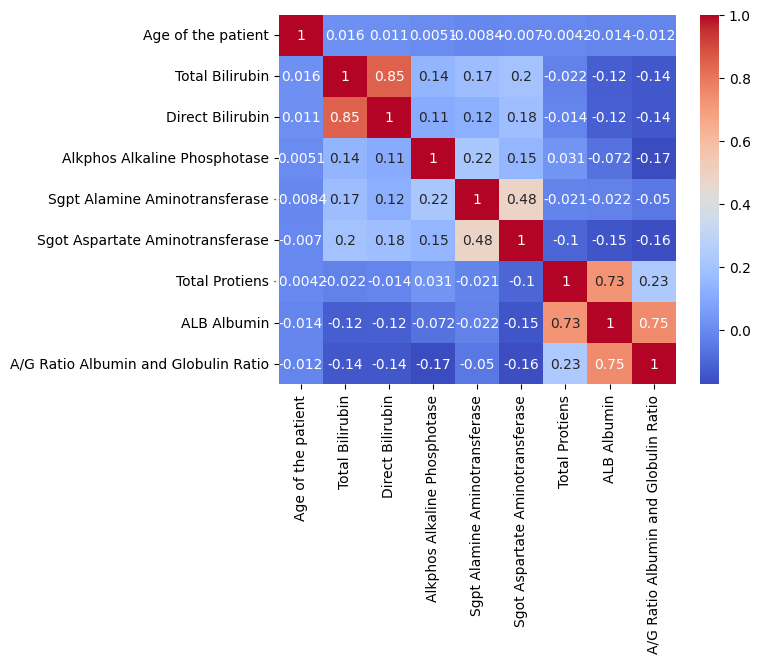

In [ ]:
cor_heatmap=data_cleaned_normalized.corr(numeric_only=True)
sb.heatmap(cor_heatmap,cmap="coolwarm",annot=True)

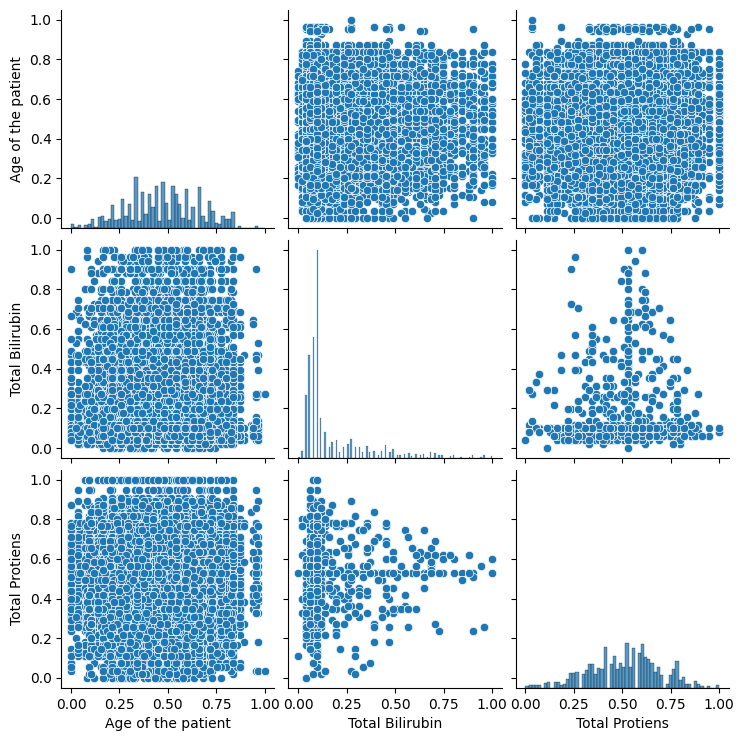

In [ ]:
sb.pairplot(data_cleaned_normalized,vars=["Age of the patient","Total Bilirubin","Total Protiens"])
plt.show()

In [ ]:
data=pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='ISO-8859-1')
new_data=pd.concat([data_cleaned_normalized,data['Gender of the patient']], axis=1)
new_data.head()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient
0,0.717647,0.058824,0.000000,0.295943,0.054545,0.046784,0.563636,0.521739,0.428571,1,Female
1,0.682353,0.098039,0.035714,0.324582,0.490909,0.526316,0.690909,0.500000,0.314286,1,Male
2,0.682353,0.098039,0.035714,0.324582,0.454545,0.339181,0.600000,0.521739,0.421429,1,Male
3,0.635294,0.117647,0.107143,0.284010,0.036364,0.058480,0.563636,0.543478,0.500000,1,Male
4,0.800000,0.686275,0.678571,0.315036,0.154545,0.286550,0.654545,0.326087,0.071429,1,Male


In [ ]:
data.groupby('Gender of the patient')['Age of the patient'].mean()

Gender of the patient
Female    43.226964
Male      44.447462
Name: Age of the patient, dtype: float64

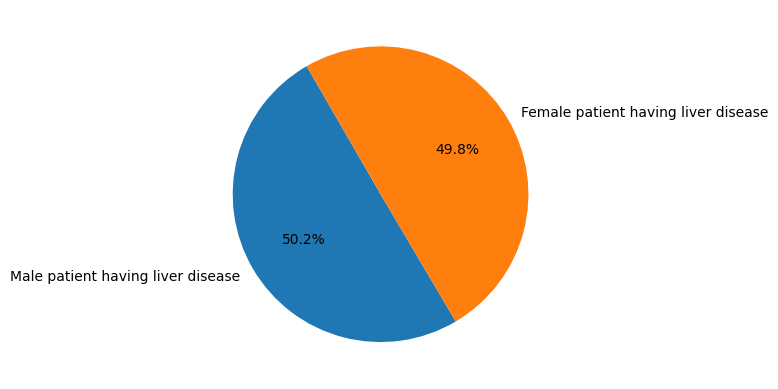

In [ ]:
m=data[(data['Gender of the patient'] == 'Male') & (data['Result'] == 1)]
f=data[(data['Gender of the patient'] == 'Female') & (data['Result'] == 1)]

total_m=len(data[data['Gender of the patient'] == 'Male'])
total_f=len(data[data['Gender of the patient'] == 'Female'])

p_m=(len(m)/total_m)*100
p_f=(len(f)/total_f)*100

plt.pie([p_m,p_f], labels=['Male patient having liver disease','Female patient having liver disease'],autopct='%1.1f%%',startangle=120)
plt.show()

In [ ]:
encoder=ce.BinaryEncoder(cols=['Gender of the patient'],return_df=True)
newData= encoder.fit_transform(new_data)

In [ ]:
df=newData.drop_duplicates()
print(len(df))

19206


In [ ]:
for col in df.columns:
    if col!='Result' and col!='Gender of the patient_0' and col!='Gender of the patient_1' and col!='Gender of the patient_2':
        x=np.array(df[col]).reshape(-1,1)
        y=np.array(df['Result'])
        F,pval=f_classif(x,y)
        print(col)
        print(F,pval)


Age of the patient
[0.09885733] [0.75320863]
Total Bilirubin
[697.15561654] [6.09641578e-151]
Direct Bilirubin
[689.78318293] [2.14983334e-149]
Alkphos Alkaline Phosphotase
[621.17493511] [5.76390434e-135]
Sgpt Alamine Aminotransferase
[725.17037599] [8.1424188e-157]
Sgot Aspartate Aminotransferase
[780.18963875] [2.50510295e-168]
Total Protiens
[12.03642259] [0.00052285]
ALB Albumin
[537.14443148] [3.19211318e-117]
A/G Ratio Albumin and Globulin Ratio
[661.80689196] [1.62004001e-143]


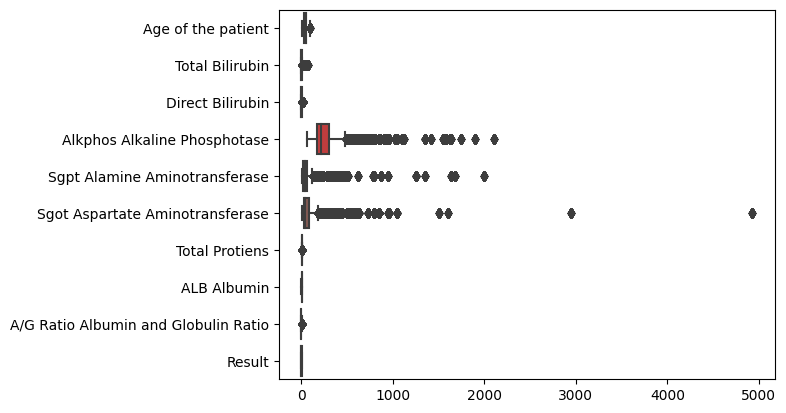

In [ ]:
sb.boxplot(data=data,orient='h')
plt.show()

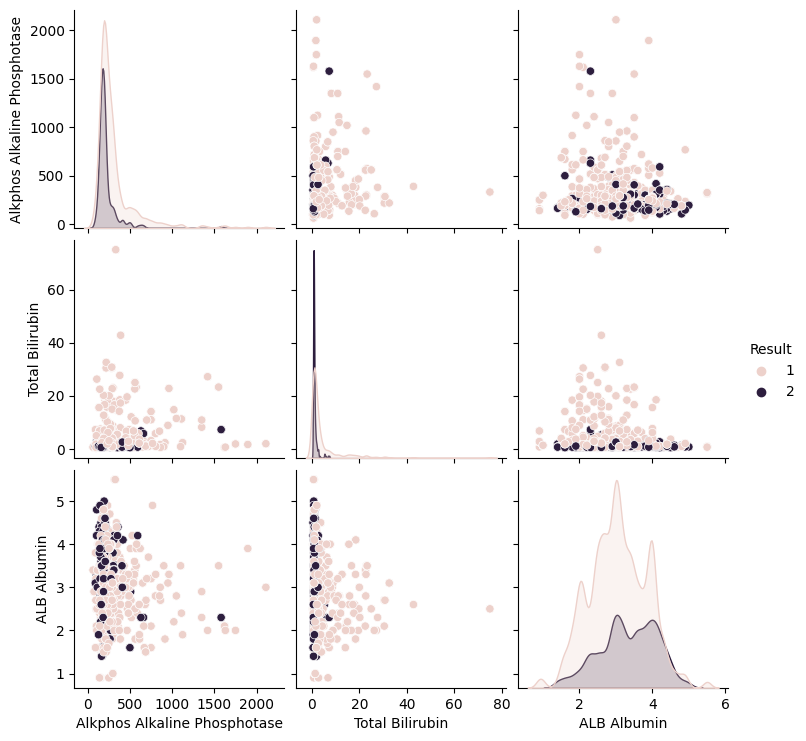

In [ ]:
sb.pairplot(data=data,vars=["Alkphos Alkaline Phosphotase","Total Bilirubin","ALB Albumin"],hue='Result')
plt.show()

In [ ]:
newData.head

<bound method NDFrame.head of        Age of the patient  Total Bilirubin  Direct Bilirubin  \
0                0.717647         0.058824          0.000000   
1                0.682353         0.098039          0.035714   
2                0.682353         0.098039          0.035714   
3                0.635294         0.117647          0.107143   
4                0.800000         0.686275          0.678571   
...                   ...              ...               ...   
30686            0.541176         0.352941          0.321429   
30687            0.600000         0.490196          0.428571   
30688            0.588235         0.098039          0.035714   
30689            0.517647         0.294118          0.321429   
30690            0.305882         0.529412          0.535714   

       Alkphos Alkaline Phosphotase  Sgpt Alamine Aminotransferase  \
0                          0.295943                       0.054545   
1                          0.324582                       0.4

In [ ]:
from scipy.stats import chi2_contingency
d=pd.crosstab(new_data['Gender of the patient'],new_data['Result'])
chi2_stat,p_val,dof,e_d= chi2_contingency(d)
print(chi2_stat)
print(p_val)

0.5139168349743058
0.4734481863689888


In [ ]:
df=newData.drop_duplicates()
print(len(df))

19206


In [ ]:
df.shape


(19206, 12)

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Result','Gender of the patient_0','Gender of the patient_1','Age of the patient','Total Bilirubin','ALB Albumin'], axis=1)
y = df['Result']


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape


(27354, 6)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score

# feature matrix and target vector
X_cleaned = df.drop(['Result','Gender of the patient_0','Gender of the patient_1','Age of the patient','Total Bilirubin','ALB Albumin'], axis=1)
y_cleaned = df['Result']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # standardizing the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# training the SVM model
svm_model = SVC(random_state= 42, probability = True)
svm_model.fit(X_train, y_train)

# predictions
y_pred = svm_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.8174008407969293
Precision: 0.9522821576763485


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.7861271676300577


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
X_cleaned_numerical = df.drop(['Result', 'Gender of the patient_0','Gender of the patient_1','Age of the patient'], axis=1, errors='ignore')
y_cleaned_numerical = df['Result']
#  K values
k_values = [3, 7, 10]
k_fold_accuracies = {}

# performing k-fold cross-validation
for k in k_values:
    # applying k-fold cross-validation
    scores = cross_val_score(svm_model, X_resampled, y_resampled, cv=k)

    # mean accuracy for this k
    mean_accuracy = np.mean(scores)

    # storing the mean accuracy for this k in the dictionary
    k_fold_accuracies[k] = mean_accuracy

# accuracies
print("K-fold cross-validation accuracies:", k_fold_accuracies)


K-fold cross-validation accuracies: {3: 0.8048183081085033, 7: 0.809570606602035, 10: 0.8107770053561693}


In [ ]:
from sklearn.naive_bayes import GaussianNB


# feature matrix and target vector
X_cleaned = df.drop(['Result','Gender of the patient_0','Gender of the patient_1','Age of the patient','Total Bilirubin','ALB Albumin'], axis=1)
y_cleaned = df['Result']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Training the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Naive Bayes Predictions
y_pred_nb = naive_bayes_model.predict(X_test)

# Naive Bayes Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Precision: {precision_nb}")

Naive Bayes Accuracy: 0.654724913178578
Naive Bayes Precision: 0.7406989853438557


In [ ]:
f1 = f1_score(y_test, y_pred_nb)
print("F1 Score:", f1)

F1 Score: 0.5818020810272305


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

# accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

# accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.9901297751782124
Random Forest Accuracy: 0.9943337598245293


In [ ]:
entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
entropy.fit(X_train, y_train)
acc_entropy = entropy.score(X_test, y_test)

gini = DecisionTreeClassifier(criterion="gini", random_state=42)
gini.fit(X_train, y_train)
acc_gini = gini.score(X_test, y_test)

print(f"Accuracy with entropy criterion: {acc_entropy}")
print(f"Accuracy with gini impurity criterion: {acc_gini}")

if acc_entropy > acc_gini:
    best = "entropy"
else:
    best = "gini impurity"

print(f"Best criterion: {best}")

Accuracy with entropy criterion: 0.9901297751782124
Accuracy with gini impurity criterion: 0.9886675196490586
Best criterion: entropy


In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# hyperparameters to select from
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 50,100],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

dt_grid_search.fit(X_train, y_train)

best_dt_params = dt_grid_search.best_params_
best_dt_estimator = dt_grid_search.best_estimator_

# best parameters
print("Best Decision Tree Parameters:", best_dt_params)

# best model used to make predictions
dt_predictions = best_dt_estimator.predict(X_test)

# accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9886675196490586


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

# hyperparameters to select from
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
best_rf_estimator = rf_grid_search.best_estimator_

# best parameters
print("Best Random Forest Parameters:", best_rf_params)

rf_predictions = best_rf_estimator.predict(X_test)

# accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.9941509778833851


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth = None, min_samples_leaf = 1, min_samples_split = 2,random_state=42)
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

# accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest Classifier
#rf_classifier = RandomForestClassifier(max_depth = 30, min_samples_split = 5, n_estimators=100, random_state=42)
rf_classifier = RandomForestClassifier(max_depth = 30, min_samples_split = 2, n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

# accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.9901297751782124
Random Forest Accuracy: 0.9943337598245293


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=3, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
# the mean accuracy across all folds
print("Mean Accuracy: {:.5f}".format(np.mean(cv_scores)))

Cross-Validation Scores: [0.99166484 0.99725817 0.99605177]
Mean Accuracy: 0.99499


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X_cleaned, y_cleaned, cv=3, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
# the mean accuracy across all folds
print("Mean Accuracy: {:.5f}".format(np.mean(cv_scores)))

Cross-Validation Scores: [0.99297095 0.99515776 0.99468916]
Mean Accuracy: 0.99427


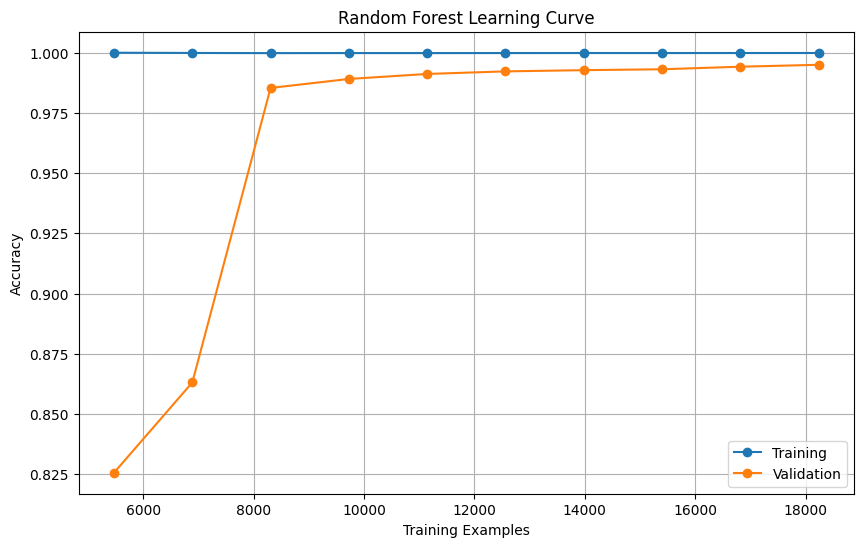

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(rf_classifier, X_resampled, y_resampled, cv=3, train_sizes=np.linspace(0.3, 1, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')

plt.plot(train_sizes, train_scores_mean, label='Training', marker='o')
plt.plot(train_sizes, validation_scores_mean, label='Validation', marker='o')

plt.legend(loc='best')
plt.grid(True)

plt.show()



In [ ]:
from sklearn.metrics import f1_score, precision_score

def evaluation(y_true, y_pred, title):
    f1 = f1_score(y_true, y_pred)
    p = precision_score(y_true, y_pred)
    print(title)
    print("F1 Score:",f1)
    print("Precision:",p)
    print()

# Decision Tree
evaluation(y_test, dt_predictions, title="Decision Tree")

# Random Forest
evaluation(y_test, rf_predictions, title="Random Forest")

Decision Tree
F1 Score: 0.9901603498542274
Precision: 0.989799635701275

Random Forest
F1 Score: 0.9943687556766576
Precision: 0.9909485879797248



In [ ]:
from sklearn.metrics import roc_auc_score
y_scores = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Print the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9900894091384842


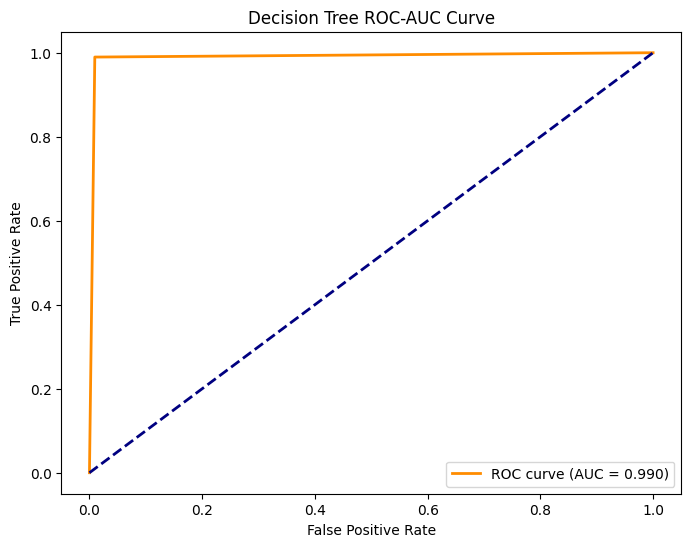

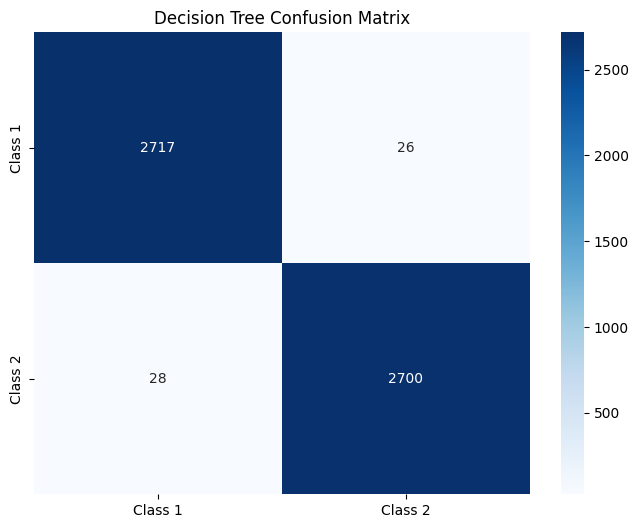

Decision Tree
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2743
           2       0.99      0.99      0.99      2728

    accuracy                           0.99      5471
   macro avg       0.99      0.99      0.99      5471
weighted avg       0.99      0.99      0.99      5471



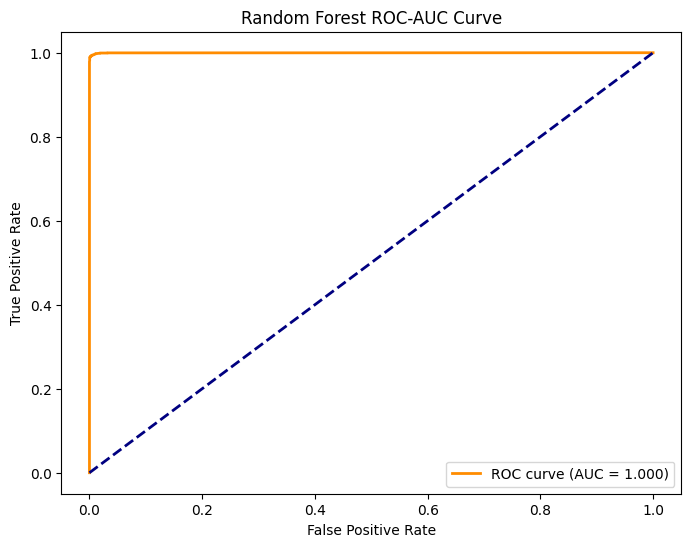

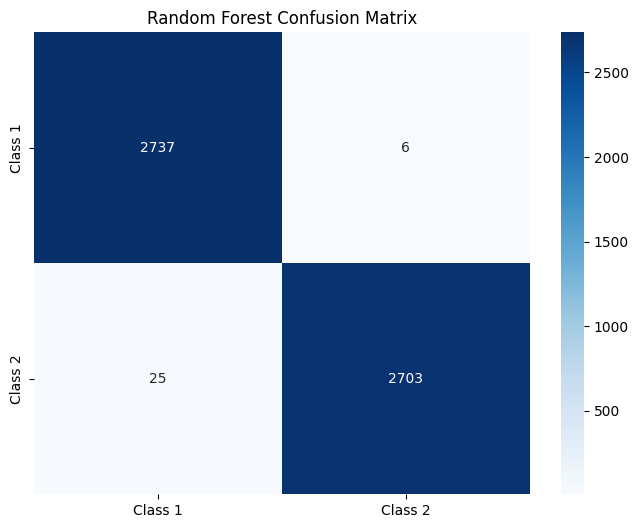

Random Forest
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      2743
           2       1.00      0.99      0.99      2728

    accuracy                           0.99      5471
   macro avg       0.99      0.99      0.99      5471
weighted avg       0.99      0.99      0.99      5471



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

y_test_binary = (y_test == 2).astype(int) # convert y_test to binary values so 1 represents class 1 and 0 represents class 2

# Calculate ROC curve for Decision Tree
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=dt_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree ROC-AUC Curve")
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix for Decision Tree
cm = confusion_matrix(y_true=y_test, y_pred=dt_classifier.predict(X_test))
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Decision Tree Classification Report
print("Decision Tree")
print(classification_report(y_test, dt_predictions))

# Calculate ROC curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest ROC-AUC Curve")
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix for Random Forest

cm = confusion_matrix(y_true=y_test, y_pred=rf_classifier.predict(X_test))
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.title("Random Forest Confusion Matrix")
plt.show()

# Random Forest Classification Report
print("Random Forest")
print(classification_report(y_test, rf_predictions))

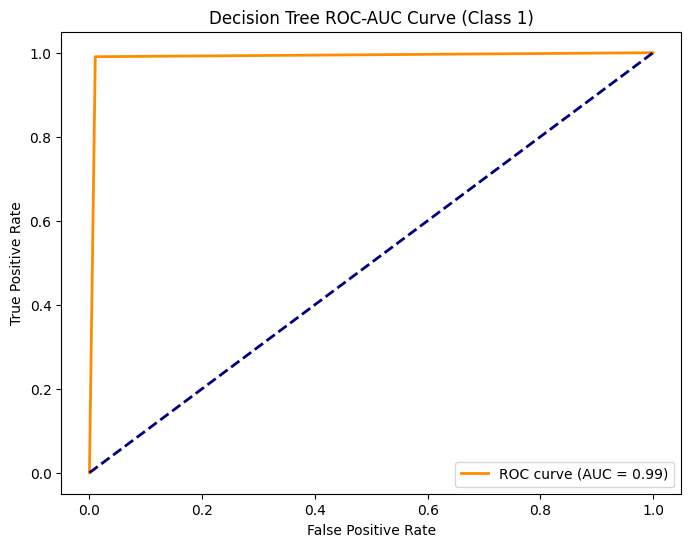

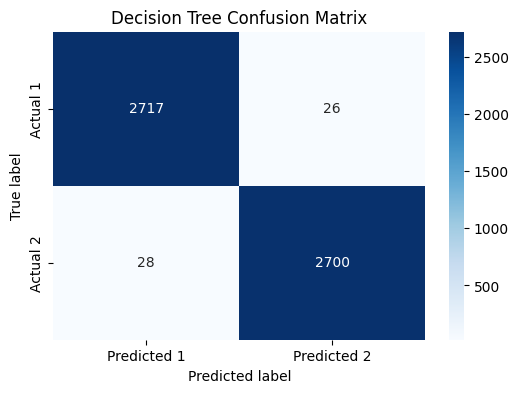

Decision Tree
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2743
           2       0.99      0.99      0.99      2728

    accuracy                           0.99      5471
   macro avg       0.99      0.99      0.99      5471
weighted avg       0.99      0.99      0.99      5471



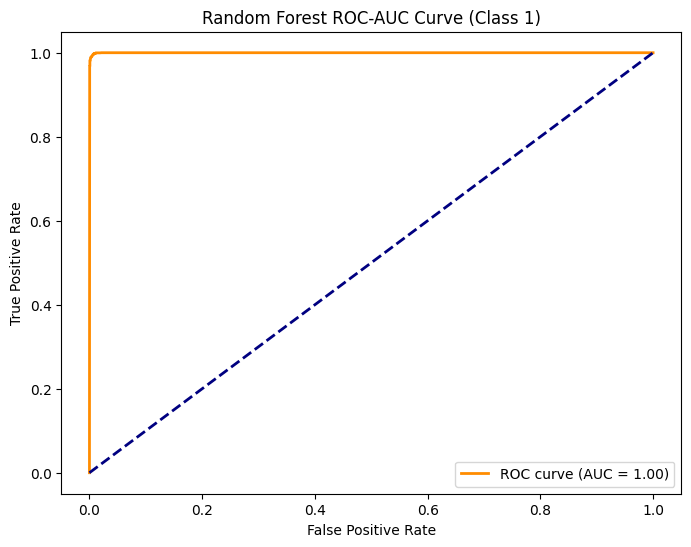

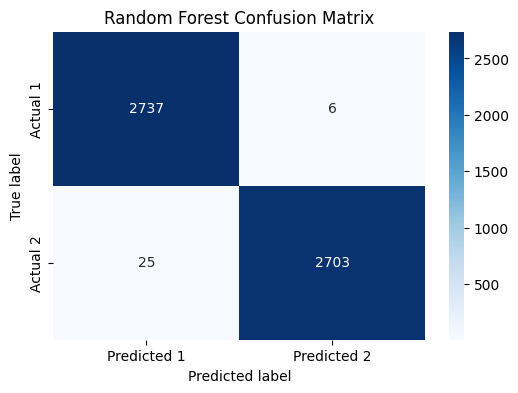

Random Forest
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      2743
           2       1.00      0.99      0.99      2728

    accuracy                           0.99      5471
   macro avg       0.99      0.99      0.99      5471
weighted avg       0.99      0.99      0.99      5471



In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Assuming you have y_test, dt_predictions, and rf_predictions from your previous code

# # Function to plot ROC curve
# def plot(y_true, y_probs, title, pos_label):
#     fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 0], pos_label=pos_label)
#     roc_auc = auc(fpr, tpr)

#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(title)
#     plt.legend(loc='lower right')
#     plt.show()

# # Function to plot confusion matrix
# def plot_confusion_matrix(y_true, y_pred, title):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 2'], yticklabels=['Actual 1', 'Actual 2'])
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.title(title)
#     plt.show()

# # Decision Tree
# plot(y_test, dt_classifier.predict_proba(X_test), title="Decision Tree ROC-AUC Curve (Class 1)", pos_label=1)
# plot_confusion_matrix(y_test, dt_predictions, title="Decision Tree Confusion Matrix")
# from sklearn.metrics import classification_report

# # Decision Tree
# print("Decision Tree")
# print(classification_report(y_test, dt_predictions))

# # Random Forest
# plot(y_test, rf_classifier.predict_proba(X_test), title="Random Forest ROC-AUC Curve (Class 1)", pos_label=1)
# plot_confusion_matrix(y_test, rf_predictions, title="Random Forest Confusion Matrix")


# # Random Forest
# print("Random Forest")
# print(classification_report(y_test, rf_predictions))

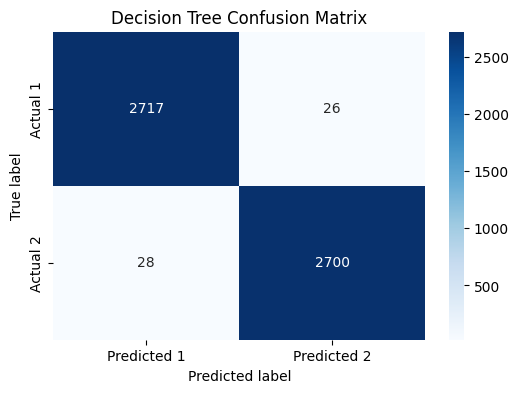

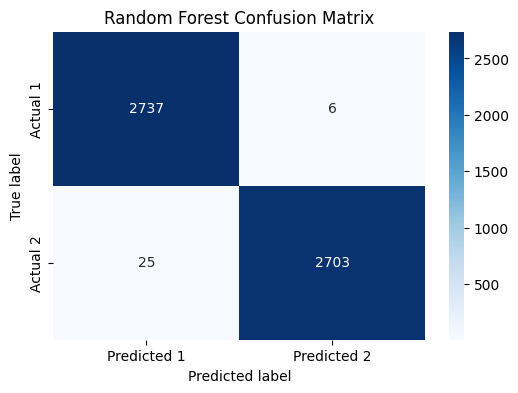

In [ ]:
# from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix(y_true, y_pred, title):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 4))
#     sb.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 2'], yticklabels=['Actual 1', 'Actual 2'])
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.title(title)
#     plt.show()

# # Confusion matrix for Decision Tree
# plot_confusion_matrix(y_test, dt_predictions, title="Decision Tree Confusion Matrix")

# # Confusion matrix for Random Forest
# plot_confusion_matrix(y_test, rf_predictions, title="Random Forest Confusion Matrix")

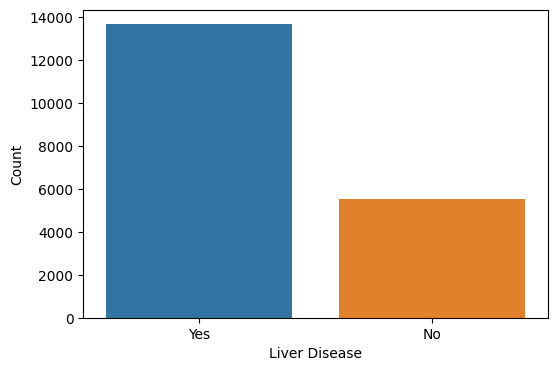

Class Distribution:
1    13677
2     5529
Name: Result, dtype: int64


In [ ]:
plt.figure(figsize=(6, 4))
sb.countplot(data=df, x='Result')
plt.xlabel('Liver Disease')
plt.ylabel('Count')
plt.xticks([0,1], ['Yes','No'])
plt.show()

count=df['Result'].value_counts()
print("Class Distribution:")
print(count)

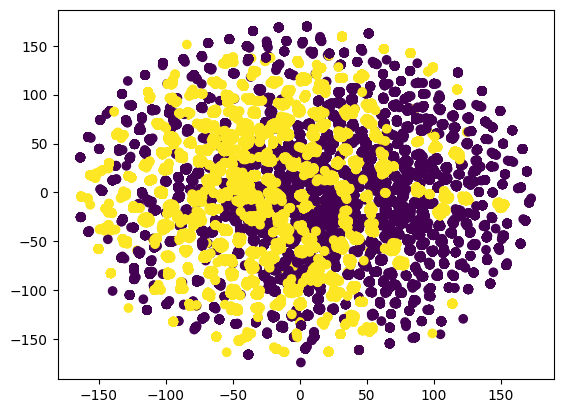

In [ ]:
X=X_resampled
y=y_resampled

tsne=TSNE(n_components=2,random_state=50)
xtsne=tsne.fit_transform(X)

plt.scatter(x=xtsne[:, 0],y=xtsne[:, 1],c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Setting the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating KNN model
knn = KNeighborsClassifier()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Training KNN with best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Making predictions
knn_predictions = knn_best.predict(X_test)
knn_predictions1 = knn_best.predict(X_train)

# Calculating accuracy, F1 score, and precision
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_accuracy1 = accuracy_score(y_train, knn_predictions1)
knn_f1 = f1_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)

print("Accuracy:", knn_accuracy)
print("Accuracy_train:", knn_accuracy1)
print("F1 Score:", knn_f1)
print("Precision:", knn_precision)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.993968195942241
Accuracy_train: 0.9999086048530823
F1 Score: 0.993972602739726
Precision: 0.9959736456808199


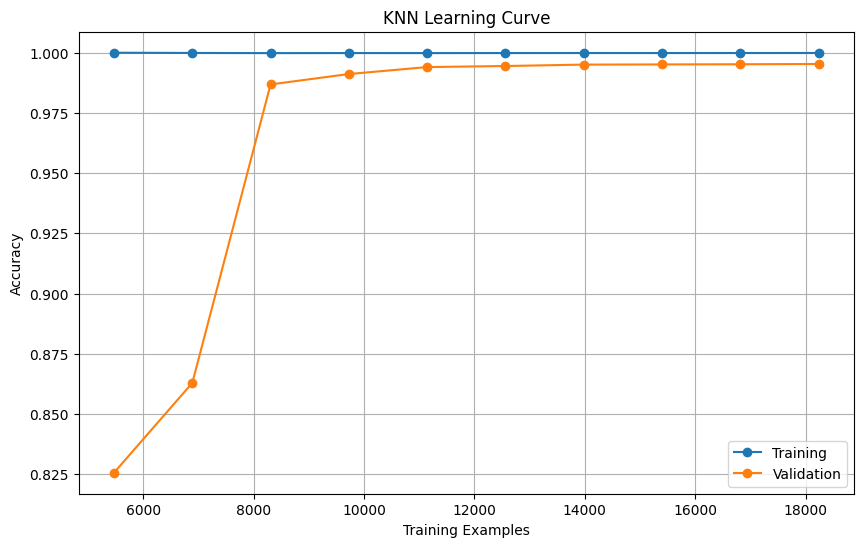

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(knn_best, X_resampled, y_resampled, cv=3, train_sizes=np.linspace(0.3, 1, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('KNN Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')

plt.plot(train_sizes, train_scores_mean, label='Training', marker='o')
plt.plot(train_sizes, validation_scores_mean, label='Validation', marker='o')

plt.legend(loc='best')
plt.grid(True)

plt.show()

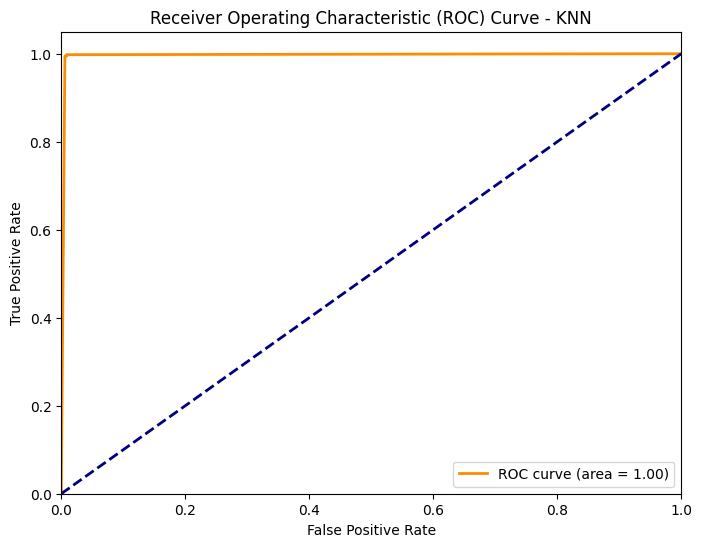

KNN
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2743
           2       0.99      0.99      0.99      2728

    accuracy                           0.99      5471
   macro avg       0.99      0.99      0.99      5471
weighted avg       0.99      0.99      0.99      5471



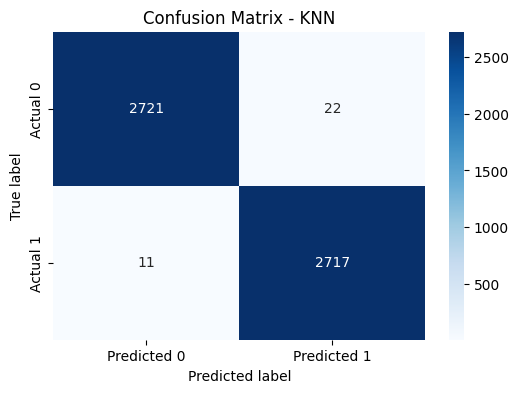

KNN
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2743
           2       0.99      0.99      0.99      2728

    accuracy                           0.99      5471
   macro avg       0.99      0.99      0.99      5471
weighted avg       0.99      0.99      0.99      5471



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Assuming you have X_test, y_test, and knn model from your previous code

# Map {1, 2} labels to {0, 1}
y_test_binary = (y_test == 2).astype(int)

# Predict probabilities for the positive class
# y_probs = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=knn_best.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()
print("KNN")
print(classification_report(y_test, dt_predictions))
# Confusion matrix
y_pred = knn_best.predict(X_test)

y_pred_binary = (y_pred == 2).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - KNN')
plt.show()
print("KNN")
print(classification_report(y_test, dt_predictions))

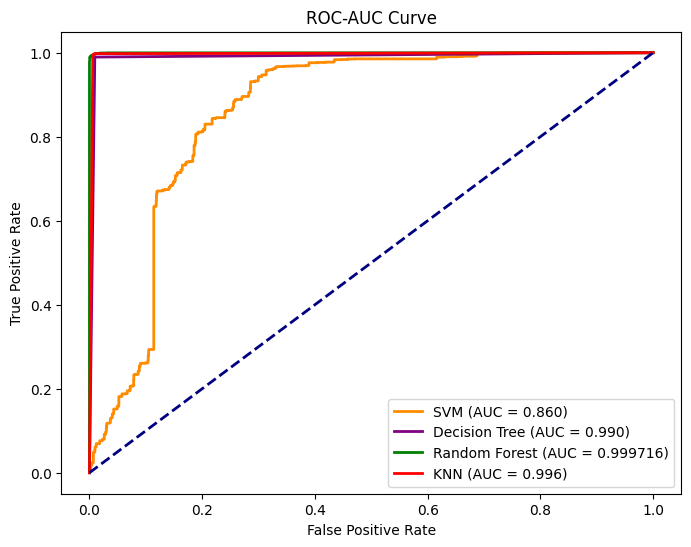

In [ ]:
# Combined ROC-AUC curve for all models in a single plot
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_test_binary = (y_test == 2).astype(int) # convert y_test to binary values so 1 represents class 1 and 0 represents class 2

# Calculate ROC curve for SVM
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=svm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
svm_model.fit(X_train, y_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc:.3f})')

# Calculate ROC curve for Decision Tree
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=dt_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
dt_classifier.fit(X_train, y_train)
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Decision Tree (AUC = {roc_auc:.3f})')

# Calculate ROC curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
rf_classifier.fit(X_train, y_train)
plt.plot(fpr, tpr, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc:.6f})')

# Calculate ROC curve for KNN
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=knn_best.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
knn_best.fit(X_train, y_train)
plt.plot(fpr, tpr, color='red', lw=2, label=f'KNN (AUC = {roc_auc:.3f})')

# Calculate ROC curve for Neural Network
#fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=nn_model.predict_proba(X_test)[:, 0])
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr, color='blue', lw=2, label=f'Neural Network (AUC = {roc_auc:.3f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming X_resampled and y_resampled are already defined

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert y values for the sigmoid output
y_train = (y_train == 2).astype(int)
y_test = (y_test == 2).astype(int)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and compile the neural network model
nn_model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

adam = Adam(learning_rate=0.001)
nn_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the neural network model
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Making predictions for evaluation metrics calculation
nn_predictions_prob = nn_model.predict(X_test_scaled)
nn_predictions = (nn_predictions_prob > 0.5).astype(int)

# Calculate accuracy, F1 score, and precision for the neural network
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)

print("Neural Network Metrics:")
print("Accuracy:", nn_accuracy)
print("F1 Score:", nn_f1)
print("Precision:", nn_precision)

Epoch 1/100
2189/2189 [==============================] - 11s 3ms/step - loss: 0.6021 - accuracy: 0.6759
Epoch 2/100
2189/2189 [==============================] - 4s 2ms/step - loss: 0.5345 - accuracy: 0.7263
Epoch 3/100
2189/2189 [==============================] - 6s 3ms/step - loss: 0.4983 - accuracy: 0.7582
Epoch 4/100
2189/2189 [==============================] - 4s 2ms/step - loss: 0.4735 - accuracy: 0.7770
Epoch 5/100
2189/2189 [==============================] - 4s 2ms/step - loss: 0.4521 - accuracy: 0.7875
Epoch 6/100
2189/2189 [==============================] - 5s 2ms/step - loss: 0.4324 - accuracy: 0.8051
Epoch 7/100
2189/2189 [==============================] - 5s 2ms/step - loss: 0.4164 - accuracy: 0.8129
Epoch 8/100
2189/2189 [==============================] - 4s 2ms/step - loss: 0.4046 - accuracy: 0.8179
Epoch 9/100
2189/2189 [==============================] - 4s 2ms/step - loss: 0.3949 - accuracy: 0.8248
Epoch 10/100
2189/2189 [==============================] - 5s 2ms/step - 

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Predict probabilities
y_pred_probs = nn_model.predict(X_test_scaled)

# Convert probabilities to binary labels
y_pred = (y_pred_probs > 0.5).astype("int32")

# Calculate precision, and F1-score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

171/171 [==============================] - 0s 1ms/step
Precision: 0.8571428571428571
F1 Score: 0.8892025405786874


171/171 [==============================] - 0s 1ms/step


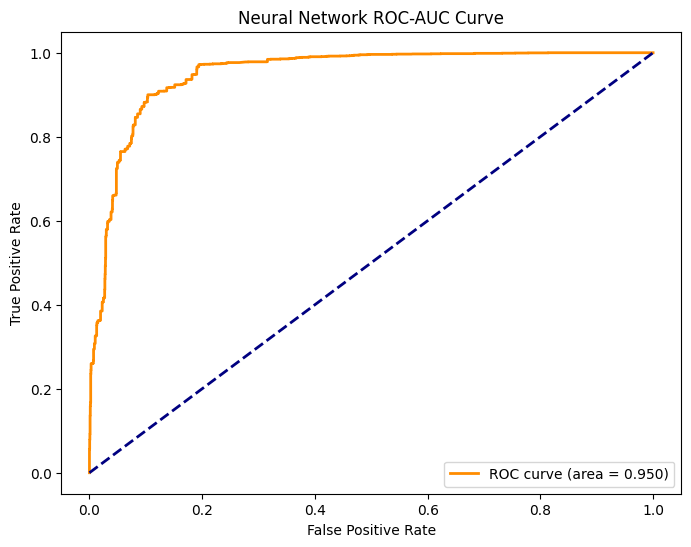

171/171 [==============================] - 0s 1ms/step


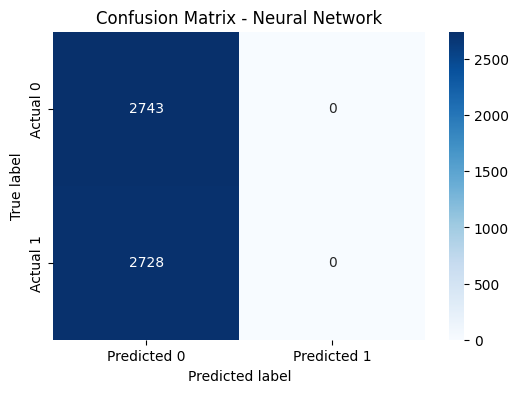

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predicted probabilities for the positive class
y_pred_prob = nn_model.predict(X_test_scaled)
y_pred_prob_positive = y_pred_prob[:, 0]

# Convert y_test to binary values so 1 represents class 1 and 0 represents class 2
y_test_binary = (y_test == 1).astype(int)

# Calculate ROC curve for Neural Network
fpr, tpr, thresholds = roc_curve(y_true=y_test_binary, y_score=y_pred_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Neural Network ROC-AUC Curve")
plt.legend(loc='lower right')
plt.show()

# Confusion matrix
y_pred = nn_model.predict(X_test_scaled)

y_pred_binary = (y_pred == 2).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Neural Network')
plt.show()